In [14]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt

In [10]:
# We use keras to encode the network :

the_network = tf.keras.Sequential([
              tf.keras.layers.Dense(3, activation='relu', input_shape=(2,)),     #  the hidden layer with 3 neurons
              tf.keras.layers.Dense(1, activation='sigmoid')                     #  the output layer with 1 neuron
])

the_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# XOR gate : input and output 
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
output_data = np.array([[0], [1], [1], [0]])             

# Training
the_network.fit(input_data, output_data, epochs=1000, verbose=0)  

# Predicting
predictions = the_network.predict(input_data)
print("Predictions:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predictions: [[0.37078416]
 [0.5808828 ]
 [0.7366122 ]
 [0.37064463]]


In [12]:
# evaluate the model :

loss, accuracy = the_network.evaluate(input_data, output_data, verbose=0)
print(f"Model Loss: {loss:.2f}%")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Loss: 0.44%
Model Accuracy: 100.00%


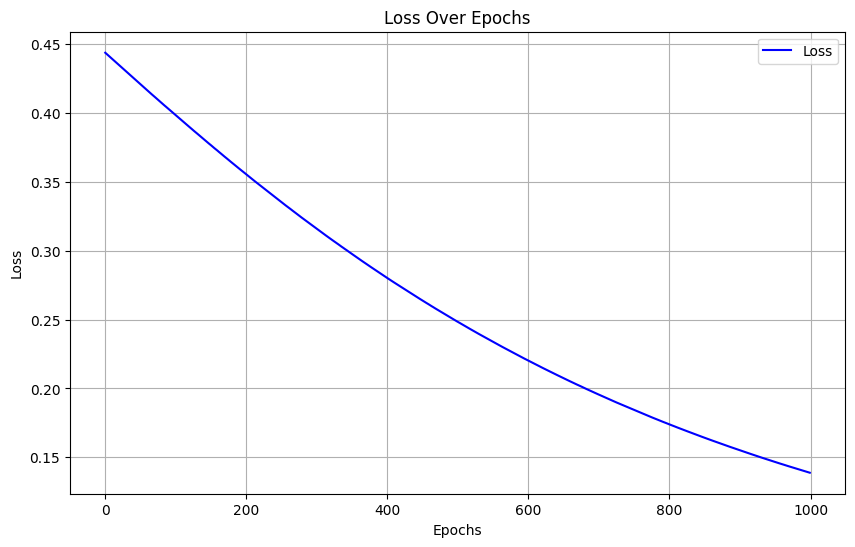

In [16]:
# recording the training history :

history = the_network.fit(input_data, output_data, epochs=1000, verbose=0)

# printing the loss over several epochs

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss', color='blue')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# To extract and print weights and biases

def print_layer_weights(ANNmodel):
    for i, layer in enumerate(ANNmodel.layers):
        
        weights = layer.get_weights()
        
        print(f"Layer {i + 1} weights:\n{weights[0]}")     # Print weight matrix
        
        if len(weights) > 1: 
            print(f"Layer {i + 1} biases:\n{weights[1]}")  # Print bias vector
        print()  

print_layer_weights(the_network)

Layer 1 weights:
[[ 2.0948238  -2.0964854   0.23528361]
 [-2.0952475   2.0964677  -0.67985153]]
Layer 1 biases:
[-4.0067401e-04 -2.4481863e-04 -2.5144368e-01]

Layer 2 weights:
[[ 1.8945677]
 [ 1.7723397]
 [-0.967449 ]]
Layer 2 biases:
[-1.7514137]



In [18]:
# To compute the errors :

errors = (predictions - output_data) ** 2

for i in range(len(predictions)):
    print(f"Input {i + 1}: Computed Output: {predictions[i][0]:.4f}, True Output: {output_data[i][0]}, Error: {errors[i][0]:.4f}")


Input 1: Computed Output: 0.3708, True Output: 0, Error: 0.1375
Input 2: Computed Output: 0.5809, True Output: 1, Error: 0.1757
Input 3: Computed Output: 0.7366, True Output: 1, Error: 0.0694
Input 4: Computed Output: 0.3706, True Output: 0, Error: 0.1374
